In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# getting all the data from different csv files into one single dataframe we dont have to concat.
 
files = [file for file in os.listdir(r"D:\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    file_path = os.path.join(r"D:\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data",file)
    df = pd.read_csv(file_path)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

In [3]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
all_months_data.dropna(inplace=True) # we can see above there are null values so dropping them.

In [5]:
all_months_data.isnull().sum() # no null values anymore.

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [6]:
all_months_data['Quantity Ordered'].unique() # checking absurd values.

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [7]:
# dropping absurd values.

all_months_data.drop(index=all_months_data[all_months_data['Quantity Ordered']== 'Quantity Ordered'].index, inplace=True)

In [8]:
all_months_data['Product'].unique() # checking absurd values.

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [9]:
all_months_data['Price Each'].unique() # checking absurd values.

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', '700.0', '1700.0', '150.0', '300.0',
       '400.0'], dtype=object)

In [10]:
all_months_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [11]:
all_months_data['Quantity Ordered'] = all_months_data['Quantity Ordered'].astype('int') # converting to suitable data type.

In [12]:
all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'])# converting to suitable data type.

In [13]:
all_months_data['Month'] = all_months_data['Order Date'].dt.strftime('%B') # adding new month column.

In [14]:
all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'])# converting to suitable data type.

In [15]:
all_months_data['Amount'] = all_months_data['Quantity Ordered']*all_months_data['Price Each'] # adding new total amount column.

In [16]:
all_months_data['Order ID'] = all_months_data['Order ID'].astype('int') # converting to suitable data type.

In [17]:
# to make a new column with the city name in it.

def get_city(address):
    return f"{address.split(',')[1].strip()} ({address.split(' ')[-2].strip()})"


all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x: get_city(x))

In [18]:
all_months_data['hour'] = all_months_data['Order Date'].dt.hour # making new hour column.

In [19]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles (CA),9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,8.97,Los Angeles (CA),20
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,700.00,San Francisco (CA),16
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,700.00,San Francisco (CA),7
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,379.99,San Francisco (CA),17


In [20]:
all_months_data.dtypes

Order ID                     int32
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                       object
Amount                     float64
City                        object
hour                         int64
dtype: object

## Done with cleaning the data.

#### Question 1 - What was the best month for sales and how much was earned that month?

In [21]:
sales_month = all_months_data[['Month', 'Amount', 'Quantity Ordered']].groupby(by='Month', as_index=False).sum().sort_values(by='Amount',ascending=False)
sales_month

,Month,Amount,Quantity Ordered
2,December,4557905.42,27764
10,October,3679254.16,22356
0,April,3336376.42,20226
9,November,3149785.09,19479
8,May,3101881.04,18344
7,March,2755969.40,16697
5,July,2587444.91,15781
6,June,2524464.99,14964
1,August,2191698.31,13185
3,February,2158127.48,13162


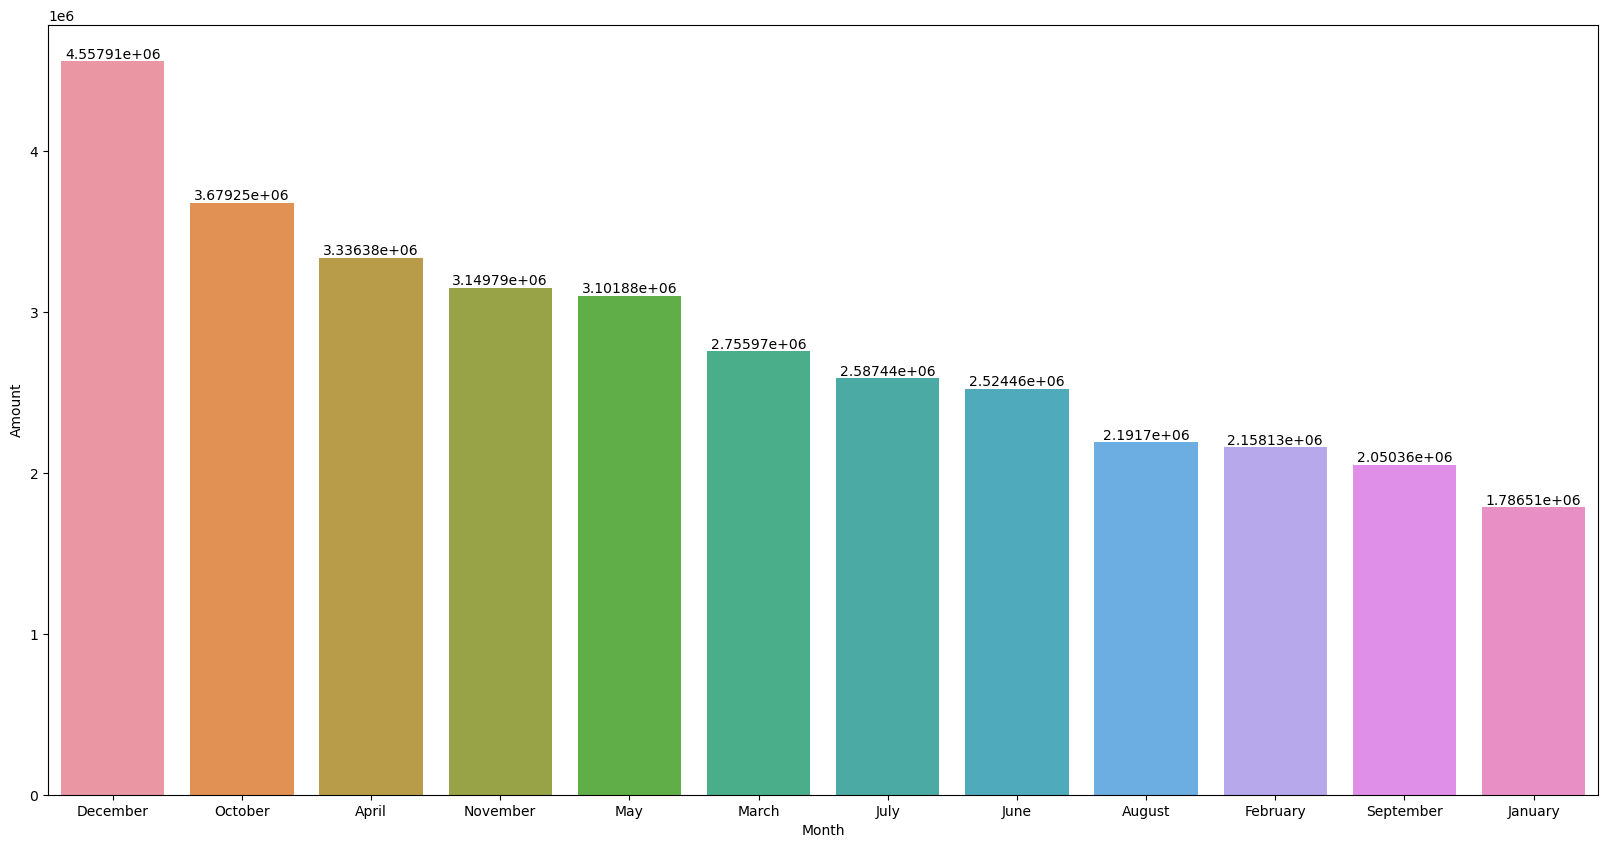

In [22]:
plt.figure(figsize=(20,10))
ax1 = sns.barplot(x='Month', y='Amount', data= sales_month)

for bars in ax1.containers:
    ax1.bar_label(bars)
    
plt.show()

#### Which city has the highest number of sales?

In [23]:
state_sales = all_months_data[['City', 'Amount','Quantity Ordered' ]].groupby(by='City', as_index=False).sum().sort_values(by='Amount', ascending=False)
state_sales

,City,Amount,Quantity Ordered
8,San Francisco (CA),8124120.94,49363
4,Los Angeles (CA),5354039.93,32722
5,New York City (NY),4581658.91,27470
2,Boston (MA),3604080.86,22123
0,Atlanta (GA),2741642.05,16304
3,Dallas (TX),2717793.72,16453
9,Seattle (WA),2693048.60,16281
7,Portland (OR),1832538.71,11110
1,Austin (TX),1786745.52,10933
6,Portland (ME),444110.53,2696


<Figure size 3000x1000 with 0 Axes>

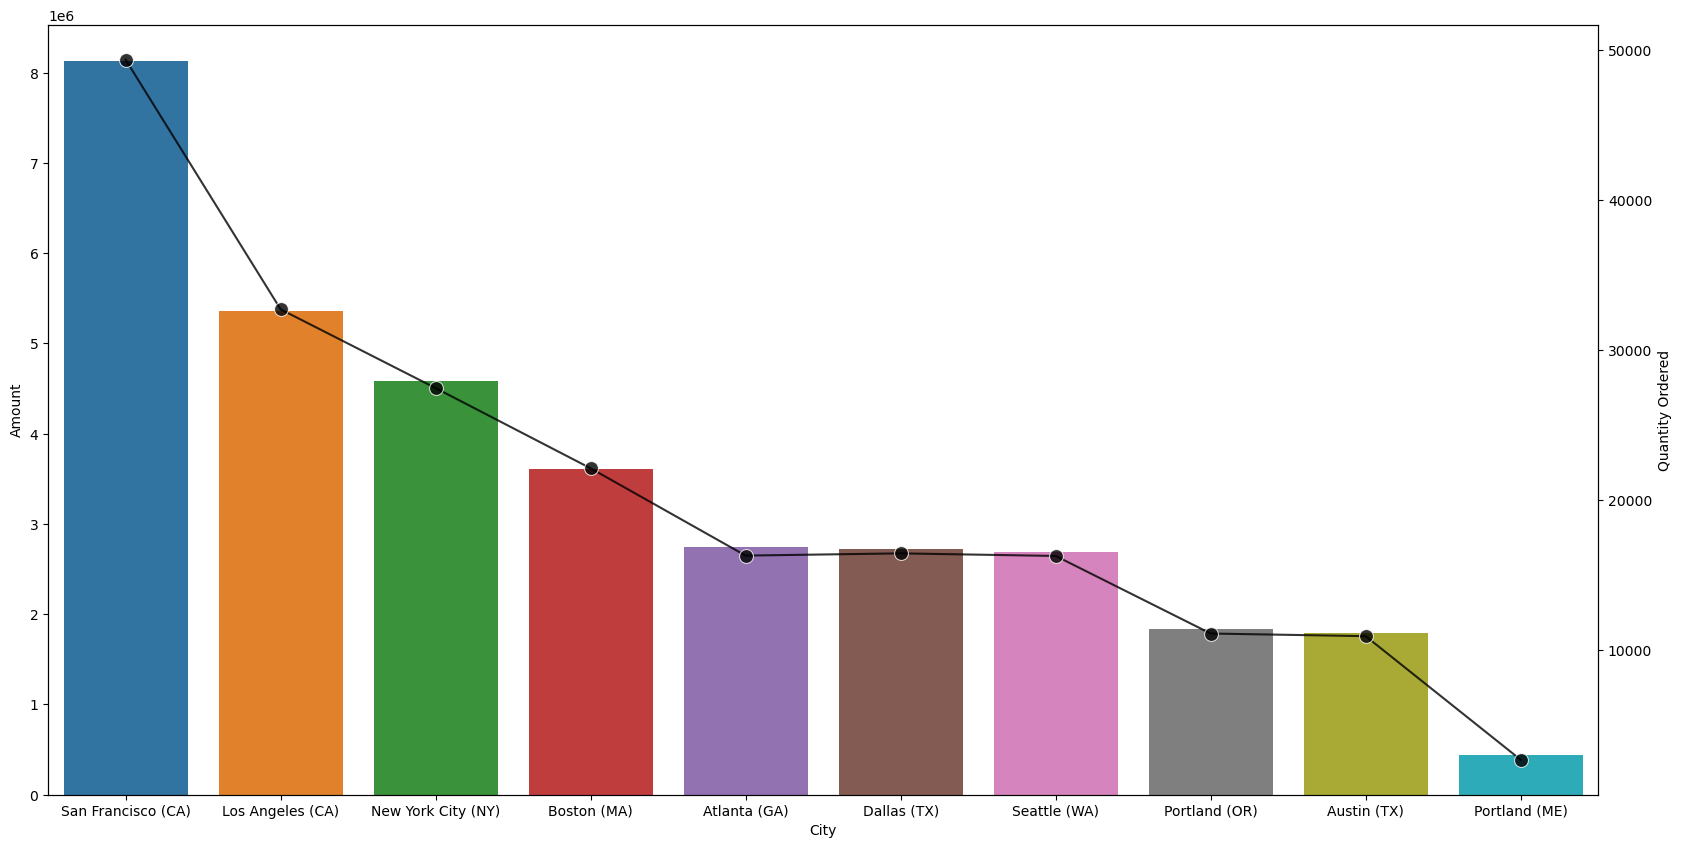

In [24]:
plt.figure(figsize=(30,10))

fig, ax2 = plt.subplots(1,1, figsize=(20,10))
ax3 = ax2.twinx()
ax3.set_xlim(1000,6000)
sns.barplot(x='City', y='Amount', data=state_sales, ax=ax2)
sns.lineplot(x='City', y='Quantity Ordered', data=state_sales, ax=ax3, color='Black', marker='o', markersize=10, alpha=0.8)
plt.show()

#### Question 3: What time the company should display advertisement to maximize the likelihood of customer's buying the products?

In [25]:
hour_sales = all_months_data[['hour', 'Amount','Quantity Ordered' ]].groupby(by='hour', as_index=False).sum().sort_values(by='hour', ascending=True)
hour_sales

,hour,Amount,Quantity Ordered
0,0,698694.76,4355
1,1,447663.86,2579
2,2,234191.08,1379
3,3,142976.54,912
4,4,161350.57,925
5,5,224313.72,1463
6,6,441523.14,2767
7,7,734595.75,4483
8,8,1181363.76,6917
9,9,1612498.90,9628


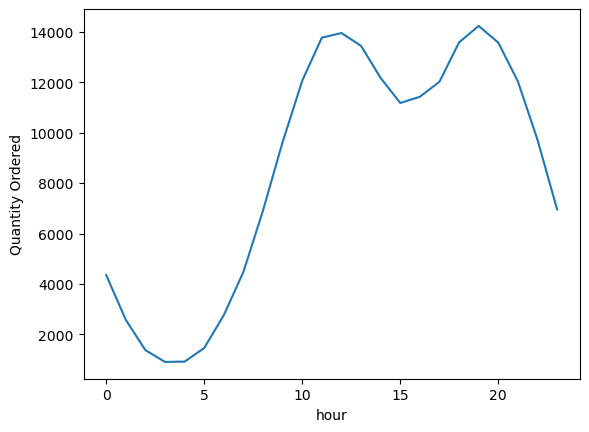

In [26]:
sns.lineplot(y='Quantity Ordered', x='hour', data=hour_sales)
plt.show()

In [27]:
product_sales = all_months_data[['Product', 'Quantity Ordered', 'Amount']].groupby(by='Product', as_index=False).sum().sort_values(by='Quantity Ordered', ascending=False)
product_sales

,Product,Quantity Ordered,Amount
5,AAA Batteries (4-pack),30487,91156.13
4,AA Batteries (4-pack),27148,104248.32
15,USB-C Charging Cable,23555,281482.25
12,Lightning Charging Cable,22841,341472.95
17,Wired Headphones,20201,242209.99
6,Apple Airpods Headphones,15383,2307450.00
7,Bose SoundSport Headphones,13236,1323467.64
2,27in FHD Monitor,7429,1114275.71
18,iPhone,6732,4712400.00
1,27in 4K Gaming Monitor,6134,2392198.66


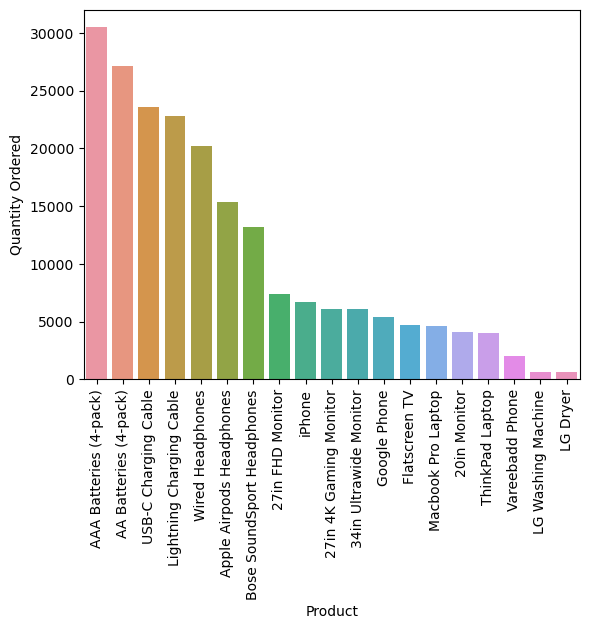

In [28]:
sns.barplot(x=product_sales['Product'], y=product_sales['Quantity Ordered'])
plt.xticks(rotation=90)
plt.show()